Packages required for GridWorld:

In [ ]:
import numpy as np
import math

Functions to show the map and policy:

In [ ]:
def printMap(world):
  # Shows GridWorld map
  m = "["
  for i in range(world.size[0]):
    for j in range(world.size[1]):
      if world.map[(i, j)] == 0: 
        m += " O "
      elif world.map[(i, j)] == -1:
        m += " X " 
      else:
        m += " F "
    if i == world.size[0] - 1:
      m += "]\n"
    else:
      m += "\n"
  print(m)

def printPolicy(world, policy):
  # Shows policy
  p = "["
  for i in range(world.size[0]):
    for j in range(world.size[1]):
      if policy[i][j] == 0:
        p += " ^ "
      elif policy[i][j] == 1:
        p += " V "
      elif policy[i][j] == 2:
        p += " < "
      else:
        p += " > "
    if i == world.size[0] - 1:
      p += "]\n" 
    else:
      p += "\n"
  print(p)

# *World* Class: 

This class stores the information of the world:

*   *Map*: Matrix that encodes the world with free cells (0), obstacles (-1) and terminal cells (1)
*   *Size*: Vector with the size of the world encoding matrix (width, height)

The following data is required to create a world:

*   Map size (width, height)
*   Terminal cell list
*   Obstacle cell list

For instance: 

w = World((10, 10), [(9, 9)], [(2, 4), (4, 2)])

Creates a world with 10 rows and 10 columns with a terminal state (9, 9) and two obstacles in (2, 4) and (4, 2).

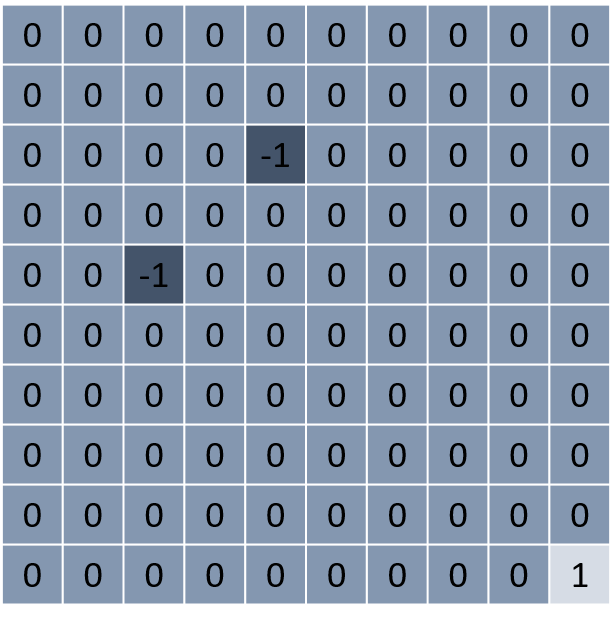

In [ ]:
class World:

  def __init__(self, size, terminal, obstacle):
    # Creates a world
    self.size = size
    self.map = {}
    for i in range(size[0]):
      for j in range(size[1]):
        # Free states
        self.map[(i, j)] = 0
        # Terminal states
        for t in terminal:
          if i==t[0] and j==t[1]:
            self.map[(i, j)] = 1
        # Obstacle states
        for o in obstacle:
          if i==o[0] and j==o[1]:
            self.map[(i, j)] = -1

Test for the *World* class:


In [ ]:
if __name__ == "__main__":
  w = World((10, 10), [(9, 9)], [(2, 4), (4, 2)])
  printMap(w)

[ O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  X  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  X  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  F ]



# *Agent* class:

This class controls the agent that learns by Reinforce Learning in *GridWorld*. 

The following data is required to create an agent:

*   *World*: World of the agent.
*   *Initial State*: Initial state of the agent.

The follosing methods are used to control the agent:

*   *nextState = move(state, action)*: Moves the agent from *state* to *nextState* applying *action*.
*   *reward = reward(nextState)*: Returns the *reward* received by the agent when going to *nextState*.
*   *nextState, reward = checkAction(state, action)*: Checks the *nextState* and *reward* when the agent takes the *action* in the *state*. This method do not change the internal state of the agent, so it can be used to sweep the state space.
*   *nextState, reward = executeAction(action)*: Executes the *action* in the current state and returns the *nextState* and *reward*. This method changes the internal state of the agent, so it should only be used when the agent travels along the world.

**Exercise**:

Try different rewards to see their influence on the behavior of the agent when executing the policy and value-based algorithms of this sheet.

# GridWorld:

*GridWorld* is a world in the form of a board widely used as test environment in Reinforcement Learning. This board has several types of cells: initial, free, obstacles, terminal... The agents must go from the initial cell to the terminal one avoiding the obstacles and traveling the minimum distance.

In [ ]:
class Agent:

  def __init__(self, world, initialState):
    # Creates an agent
    self.world = world
    self.state = np.array(initialState)

  def move(self, state, action):
    # Manages state transitions
    nextState = state + np.array(action)
    if nextState[0] < 0:
      nextState[0] = 0
    elif nextState[0] >= self.world.size[0]:
      nextState[0] = self.world.size[0] - 1
    if nextState[1] < 0:
      nextState[1] = 0
    elif nextState[1] >= self.world.size[1]:
      nextState[1] = self.world.size[1] - 1
    return nextState

  def reward(self, nextState):
    # Manages rewards
    if self.world.map[(nextState[0], nextState[1])] == 0:
      # Reward when the agent moves to a free cell
      reward = 0 # ** Try different values ** 
    elif self.world.map[(nextState[0], nextState[1])] == -1:
      # Reward when the agent tries to move to an obstacle
      reward = -1 # ** Try different values **
    elif self.world.map[(nextState[0], nextState[1])] == 1:
      # Reward when the agent moves to a terminal cell
      reward = 1 # ** Try different values **
    return reward

  def checkAction(self, state, action):
    # Planifica una acción
    nextState = self.move(state, action)
    if self.world.map[(state[0], state[1])] == -1: 
      nextState = state                            
    reward = self.reward(nextState)
    return nextState, reward

  def executeAction(self, action):
    # Planifica y ejecuta una acción
    nextState = self.move(self.state, action)
    if self.world.map[(self.state[0], self.state[1])] == -1: 
      nextState = self.state                                 
    else:
      self.state = nextState
    reward = self.reward(nextState)
    return self.state, reward  

Prueba de la clase *Agent*:

In [ ]:
if __name__ == "__main__":
  # Create the world
  w = World((10, 10), [(9, 9)], [(2, 4), (4, 2)])
  # Create the agent
  a = Agent(w, (0, 0))
  # Move the agent through the main diagonal
  
  for i in range(1,10):
    # Show every new state and its reward
    print(a.executeAction((1, 1)))

(array([1, 1]), 0)
(array([2, 2]), 0)
(array([3, 3]), 0)
(array([4, 4]), 0)
(array([5, 5]), 0)
(array([6, 6]), 0)
(array([7, 7]), 0)
(array([8, 8]), 0)
(array([9, 9]), 1)


# Policy-based method:

This is a policy-based algorithm that allows the agent to learn how to move through *GridWorld*.

The agent must go from (0, 0) to (9, 9) avoiding obstacles in (4, 2) and (2, 4). The movements of the agent can be left (-1, 0), right (1, 0), up (0, -1), and down (0, 1).

**Policy evaluation exercise**: 

Try the algorithm that evaluates the random policy with the previously described actions (left, right, up, and down).

In [ ]:
# Policy evaluation
if __name__== "__main__":
  # Create the world
  w = World((10, 10), [(9, 9)], [(4, 2), (2, 4)])
  # Create the agent
  agent = Agent(w, (0, 0))
  # Create the policy
  actions = [(-1, 0), (1, 0), (0, -1), (0, 1)] # ** Try other policies **
  # Initialize the value matrix (all to zero)
  v = []
  v.append(np.zeros(w.size)) 
  # Loop 1: Repeat until the value diference is neglectable
  theta = 0.01
  for epoch in range(1,1000):
    vp = np.zeros(w.size)
    # Loop 2: Sweep the state space to update the values
    for i in range(w.size[0]):
      for j in range(w.size[1]):
        state = (i, j)
        # Loop 3: Sweep the possible actions
        for k in range(len(actions)):
          action = actions[k]
          # Estimate the transitions and rewards
          nextState, reward = agent.checkAction(state, action)
          # Update the value
          vp[i][j] += 1/len(actions) * (reward + v[epoch-1][nextState[0]][nextState[1]])
    v.append(vp) # Save all the values to analyze them, but the algorithm only needs the two last values.
    # Difference between the two last matrices
    dif = np.abs(np.subtract(v[epoch-1], v[epoch-2]))
    value = np.max(dif) / np.max(vp)
    if value < theta: 
      print('Época: ' + str(epoch))
      print('Matriz de valor: ' + str(vp))  
      break

Época: 68
Matriz de valor: [[-2.82407283e+01 -2.97052095e+01 -3.21319312e+01 -3.44849371e+01
  -3.49108603e+01 -2.97415728e+01 -2.33181490e+01 -1.78879909e+01
  -1.41802226e+01 -1.23315193e+01]
 [-2.97052095e+01 -3.17055516e+01 -3.52132639e+01 -3.94334637e+01
  -4.34421526e+01 -3.36282672e+01 -2.45991792e+01 -1.81265270e+01
  -1.40583625e+01 -1.21048860e+01]
 [-3.21319312e+01 -3.52132639e+01 -4.06787257e+01 -4.77658704e+01
  -6.80000000e+01 -3.94738345e+01 -2.56200158e+01 -1.79070833e+01
  -1.35326282e+01 -1.15169307e+01]
 [-3.44849371e+01 -3.94334637e+01 -4.77658704e+01 -4.53625114e+01
  -4.45884177e+01 -3.25397808e+01 -2.27834202e+01 -1.62425533e+01
  -1.22963501e+01 -1.04420204e+01]
 [-3.49108603e+01 -4.34421526e+01 -6.80000000e+01 -4.45884177e+01
  -3.45733815e+01 -2.58966894e+01 -1.88455156e+01 -1.37508525e+01
  -1.05101474e+01 -8.94282371e+00]
 [-2.97415728e+01 -3.36282672e+01 -3.94738345e+01 -3.25397808e+01
  -2.58966894e+01 -1.98832050e+01 -1.48354516e+01 -1.10022895e+01
  -8.4

**Policy iteration exercise**: 

Try the following policy iteration algorithm.

In [ ]:
# Policy iteration
if __name__== "__main__":
  # Create the world
  w = World((10, 10), [(9, 9)], [(4, 2), (2, 4)])
  # Create the agent
  agent = Agent(w, (0, 0))
  # Create the policy
  actions = [(-1, 0), (1, 0), (0, -1), (0, 1)] # All the possible actions
  policy = []
  policy.append(np.zeros(w.size)) # Always apply the first action
  # Main loop: Repeat until policy convergence
  for policyEpoch in range(1, 100):
    # Evaluation loop 1: Repeat until the value difference is neglectable
    theta = 0.01
    # Initialize the value matrix (all to zero)
    v = []
    v.append(np.zeros(w.size))
    for valueEpoch in range(1, 100):
      vp = np.zeros(w.size)
      # Evaluation loop 2: Sweep the state space to update the values
      for i in range(w.size[0]):
        for j in range(w.size[1]):
          state = (i, j)
          action = int(policy[policyEpoch-1][i][j])
          # Estimate the transitions and rewards
          nextState, reward = agent.checkAction(state, actions[action])
          # Update the value
          vp[i][j] = reward + v[valueEpoch-1][nextState[0]][nextState[1]]
      v.append(vp) #  Save all the values to analyze them, but the algorithm only needs the two last valuesÇ
      # Difference between the two last matrices
      dif = np.abs(np.subtract(v[valueEpoch-1], v[valueEpoch-2]))
      value = np.max(dif) / np.max(vp)
      if value < theta: 
        #print('Época valor: ' + str(valueEpoch))
        #print('Matriz de valor: ' + str(vp))  
        break
    policyp = np.zeros(w.size)
    # Improvement loop 1: Sweep the state space to improve the policy
    for i in range(w.size[0]):
      for j in range(w.size[1]):
        state = (i, j) 
        # Improvement loop 2: Sweep all the possible actions
        bestAction = 0
        maxValue = -1000
        for k in range(len(actions)):
          action = actions[k]
          nextState, reward = agent.checkAction(state, action)
          value = reward + v[len(v)-1][nextState[0]][nextState[1]]
          # Select the best action
          if value > maxValue:
            bestAction = k
            maxValue = value
        policyp[i][j] = bestAction
    policy.append(policyp) # Save all the values to analyze them, but the algorithm only needs the two last values
    if np.equal(policy[policyEpoch-2],policy[policyEpoch-1]).all():
      #print('Época política: ' + str(policyEpoch))
      #print('Matriz de política: ' + str(policy))  
      break
  print('Valor:\n' + str(v[len(v)-1]))
  print('Política:\n' + str(policy[len(policy)-1]))
  printPolicy(w, policyp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars


Valor:
[[ 82.  83.  84.  85.  86.  87.  88.  89.  90.  91.]
 [ 83.  84.  85.  86.  87.  88.  89.  90.  91.  92.]
 [ 84.  85.  86.  87. -99.  89.  90.  91.  92.  93.]
 [ 85.  86.  87.  88.  89.  90.  91.  92.  93.  94.]
 [ 86.  87. -99.  89.  90.  91.  92.  93.  94.  95.]
 [ 87.  88.  89.  90.  91.  92.  93.  94.  95.  96.]
 [ 88.  89.  90.  91.  92.  93.  94.  95.  96.  97.]
 [ 89.  90.  91.  92.  93.  94.  95.  96.  97.  98.]
 [ 90.  91.  92.  93.  94.  95.  96.  97.  98.  99.]
 [ 91.  92.  93.  94.  95.  96.  97.  98.  99.  99.]]
Política:
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
[ V  V  V  V  V  V  V  V  V  V 
 V  V  V  V  >  V  V  V  V  V 
 V  V  V  V  ^  V  V  V  V  V 
 V  V  >  V  V  V  V  V  V 

# Value-based method:

This is a value-based algorithm that allows the agent to learn how to move through *GridWorld*.

The agent must go from (0, 0) to (9, 9) avoiding the obstacles in (4, 2) and (2, 4). The movements of the agent can be left (-1, 0), right (1, 0), up (0, -1) and down (0, 1).

**Value iteration exercise**: 

Try the following value-based algorithm.

In [ ]:
# Value iteration
if __name__== "__main__":
  # Create the world
  w = World((10, 10), [(9, 9)], [(4, 2), (2, 4)])
  printMap(w)
  # Create the agent
  agent = Agent(w, (0, 0))
  # Create the policy
  actions = [(-1, 0), (1, 0), (0, -1), (0, 1)] # All the possible actions
  policy = np.zeros(w.size)
  # Initialize the value matrix (all to zero)
  v = []
  v.append(np.zeros(w.size))
  # Loop 1: Repeat until the value difference is neglectable
  theta = 0.01
  for valueEpoch in range(1, 100):
    vp = np.zeros(w.size)
    # Loop 2: Sweep the state space to update the values
    for i in range(w.size[0]):
      for j in range(w.size[1]):
        state = (i, j)
        # Loop 3: Sweep the possible actions 
        bestAction = 0
        maxValue = -1000
        for k in range(len(actions)):
          action = actions[k]
          nextState, reward = agent.checkAction(state, action)
          value = reward + v[len(v)-1][nextState[0]][nextState[1]]
          # Select the best action
          if value > maxValue:
            bestAction = k
            maxValue = value
        # Estimate the transitions and rewards
        action = actions[bestAction]
        nextState, reward = agent.checkAction(state, action)
        # Update the value
        vp[i][j] = reward + v[valueEpoch-1][nextState[0]][nextState[1]]
        # Update the policy
        policy[i][j] = bestAction
    v.append(vp) # Save all the values to analyze them, but the algorithm only needs the two last values
    # Difference between the two last matrices
    dif = np.abs(np.subtract(v[valueEpoch-1], v[valueEpoch-2]))
    value = np.max(dif) / np.max(vp)
    if value < theta: 
      #print('Época valor: ' + str(valueEpoch))
      #print('Matriz de valor: ' + str(vp))  
      break
  print('Valor:' + str(v[len(v)-1]))
  print('Política:' + str(policy))
  printPolicy(w, policy)

[ O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  X  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  X  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  F ]

Valor:[[ 82.  83.  84.  85.  86.  87.  88.  89.  90.  91.]
 [ 83.  84.  85.  86.  87.  88.  89.  90.  91.  92.]
 [ 84.  85.  86.  87. -99.  89.  90.  91.  92.  93.]
 [ 85.  86.  87.  88.  89.  90.  91.  92.  93.  94.]
 [ 86.  87. -99.  89.  90.  91.  92.  93.  94.  95.]
 [ 87.  88.  89.  90.  91.  92.  93.  94.  95.  96.]
 [ 88.  89.  90.  91.  92.  93.  94.  95.  96.  97.]
 [ 89.  90.  91.  92.  93.  94.  95.  96.  97.  98.]
 [ 90.  91.  92.  93.  94.  95.  96.  97.  98.  99.]
 [ 91.  92.  93.  94.  95.  96.  97.  98.  99.  99.]]
Política:[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0